In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [21]:
donor_df = pd.read_csv('OrigFiles/DonorInformation.csv')  

In [42]:
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [68]:
donor_df["age"][donor_df['age']=="90-94"] = "92"
donor_df["age"][donor_df['age']=="95-99"] ="97"
donor_df["age"][donor_df['age']=="100+"] ="101"
donor_df['age'] = donor_df['age'].astype(int)

<AxesSubplot:xlabel='education_years', ylabel='Count'>

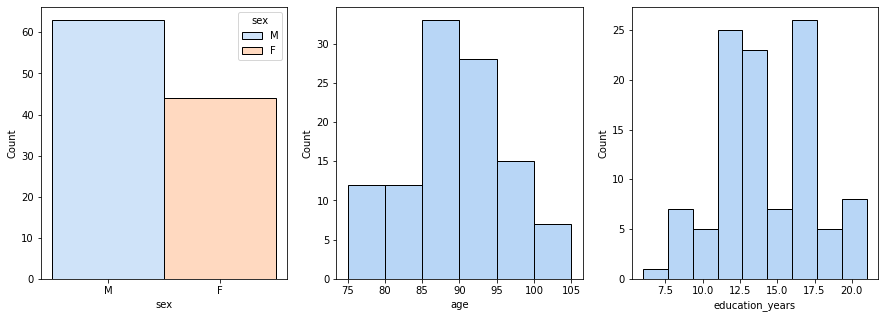

In [76]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.histplot(donor_df,  x="sex", hue="sex", ax=axs[0])
sns.histplot(donor_df,  x="age", bins=[75, 80, 85, 90, 95, 100, 105] , ax=axs[1])
sns.histplot(donor_df,  x="education_years", ax=axs[2])

Dementia / pathology variables

In [ ]:
donor_df['apo_e4_allele']= donor_df['apo_e4_allele'].fillna('N/A')
sorter =[ '< 10 sec', '10 sec - 1 min', '1-2 min', '3-5 min', '6-9 min','10 min - 1 hr', '> 1 hr',  'Unknown or N/A',]
sorterIndex = dict(zip(sorter, range(len(sorter))))
donor_df['sorter_rank'] =  donor_df['longest_loc_duration'].map(sorterIndex)
donor_df.sort_values(['sorter_rank'], ascending =[True] , inplace = True)
donor_df.drop('sorter_rank', 1, inplace = True)


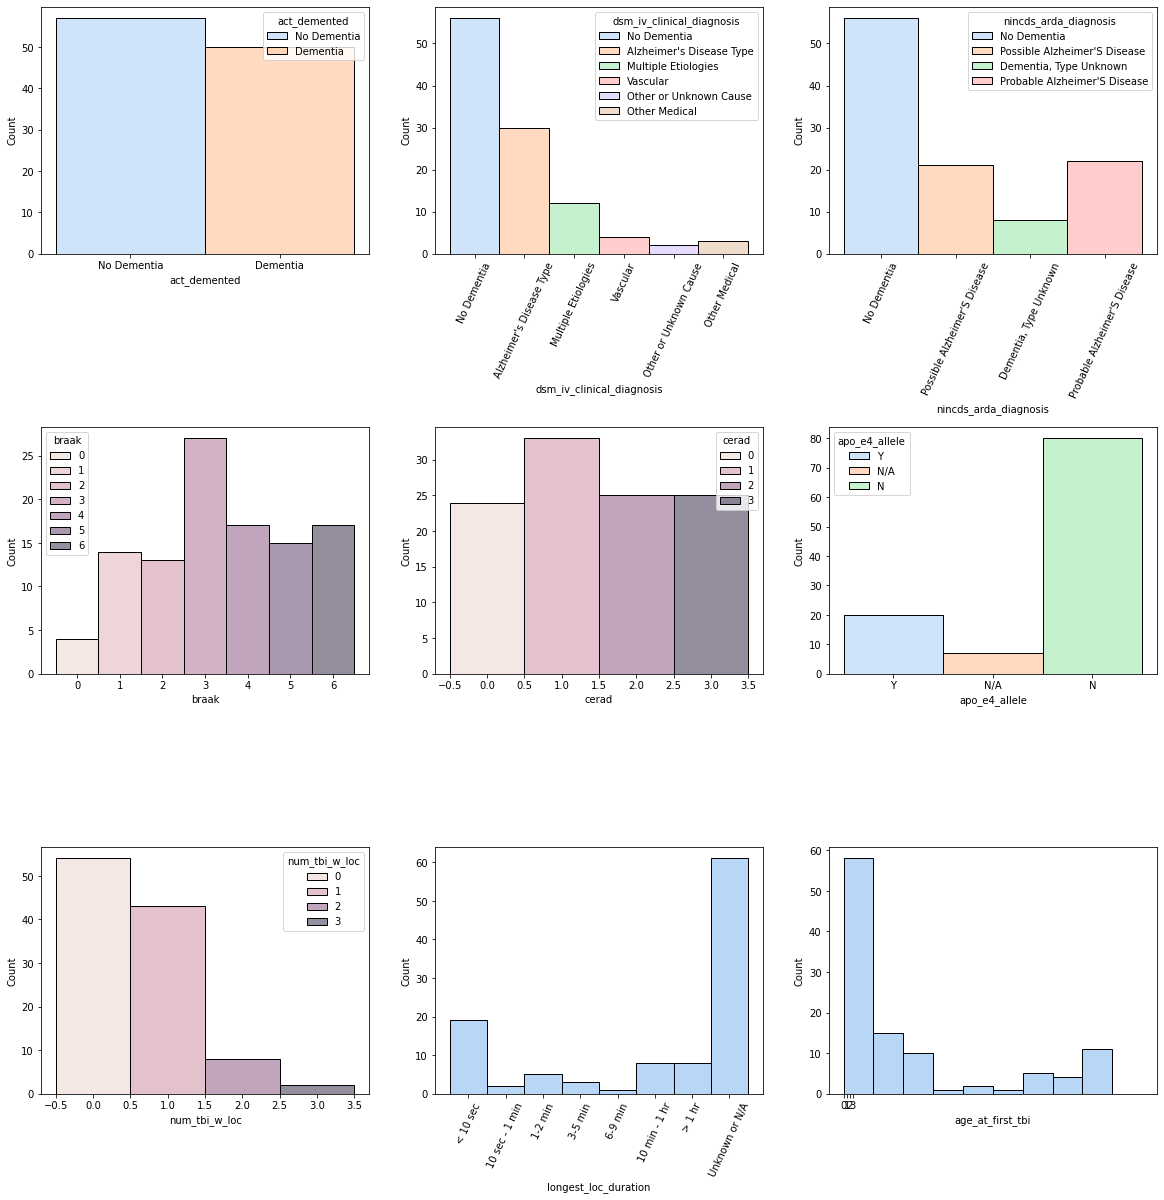

In [82]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
fig.subplots_adjust(hspace=0.7, wspace=0.2)
#fig.tight_layout()
sns.histplot(donor_df,  x="act_demented", hue="act_demented",  ax=axs[0][0])
axs[0][1].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="dsm_iv_clinical_diagnosis", hue="dsm_iv_clinical_diagnosis",  ax=axs[0][1])

axs[0][2].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="nincds_arda_diagnosis", hue="nincds_arda_diagnosis",  ax=axs[0][2])
sns.histplot(donor_df,  x="braak", hue="braak", bins=np.arange(8)-0.5,  ax=axs[1][0])
plt.xticks(range(4))
sns.histplot(donor_df,  x="cerad", hue="cerad", bins=np.arange(5)-0.5,  ax=axs[1][1])
sns.histplot(donor_df,  x="apo_e4_allele", hue="apo_e4_allele",  ax=axs[1][2])

plt.xticks(range(4))
sns.histplot(donor_df,  x="num_tbi_w_loc", hue="num_tbi_w_loc", bins=np.arange(5)-0.5,  ax=axs[2][0])
axs[2][1].tick_params(axis='x',labelrotation=65)
sns.histplot(donor_df,  x="longest_loc_duration", ax=axs[2][1])

sns.histplot(donor_df,  x="age_at_first_tbi", bins= np.arange(0, 101, 10).tolist(),  ax=axs[2][2])

plt.show()

In [ ]:
#TODO: correlation/regression on demential? TBI numbers and duration